<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

# Grouping with Pandas (Lesson + Lab)

***

Week 2 | Lesson 4.1-Alt

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Know what situations **grouping** is useful for
- Explain the **`.groupby()`** feature in Pandas
- Demonstrate aggregation /w plotting methods in Pandas

### LESSON GUIDE
| TIMING  | TYPE  | TOPIC  |
|:-:|---|---|
| 5 min  | [Introduction](#introduction)   |   |
| 15 min  | [Demo /Guided Practice](#demo)  | Discuss Grouping |
| 30 min  | [Demo /Guided Practice](#demo)  | Demonstrate .groupby |
| 20 min  | [Demo /Guided Practice](#demo)  | Plotting with groups |
| 60+ min  | [Independent Practice](#ind-practice)  |   |
| 10 min  | [Conclusion](#conclusion)  |   |


<a name="introduction"></a>
## Introduction: Grouping (5 mins)

## What have you used grouping for (work, reactionally)?

## Generally:  Multi-Dimensional Data Analysis! 
   - Describe segments of your data based on unique values
   - Understand latent charactaristics of your data
       - Summary statistics of subsets
       - Discover patterns that exist in subsets
   - Finding duplicate values given specific variables
   - Apply aggregate functions to subsets, based on variable aspects of our datasets
   

## Specific Examples
 - Sum of crimes given time of day in SF (morning, afternoon, night)
 - Count numer of people with the same last name
 - Median number of multi-unit buildings in a region
 - Popularity of movie genres based on ticket sales
 - Segmenting customers based on age, buying habbits, interests, behavior
 - Using the "GROUP BY" clause in a database query using SQL (you will learn this soon!)

![](http://www.omnis.net/support/images/technews/g2msimplebargraph.jpg)

_Think about what this would look like as a summary statistic like mean or sum?_

![](http://stephanieevergreen.com/wp-content/uploads/2013/08/DivergingFinal.png)

_Summary grouped by question and response category_

![](http://zmjones.com/static/posts/titanic-survival-glm.png)

## A slight side-trip with [Simpsons Paradox](http://vudlab.com/simpsons/)

# Demo / Codealong - .groupby()

First, a sample dataset to get us thinking about grouping on a small scale dataset.

In [35]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'cat1':['X','X','Y','Y','Z'],
                   'cat2':['alpha','beta','alpha','beta','alpha'],
                   'a':np.random.randn(5),
                   'b':np.random.randn(5)})
df

,a,b,cat1,cat2
0,-0.001154,1.389428,X,alpha
1,-1.374899,-2.135315,X,beta
2,-0.370051,1.243123,Y,alpha
3,-0.006797,0.602753,Y,beta
4,-0.213737,-0.830270,Z,alpha


**This gives us a specific feature "a", grouped by cat1.** 

_Notice that groups don't really print anything interesting on their own._

In [36]:
group = df['a'].groupby(df['cat1'])
group

**Groups can be operated on in aggregate.**

In [37]:
# mean
group.mean()

cat1
X   -0.688026
Y   -0.188424
Z   -0.213737
Name: a, dtype: float64

In [38]:
# median
group.median()

cat1
X   -0.688026
Y   -0.188424
Z   -0.213737
Name: a, dtype: float64

In [39]:
# sum
group.sum()

cat1
X   -1.376052
Y   -0.376848
Z   -0.213737
Name: a, dtype: float64

**We can use group keys that are series as well**

For example:

In [40]:
#We'll make some arrays for use as keys
cities = np.array(['NY','LA','LA','NY','NY'])
month = np.array(['JAN','FEB','JAN','FEB','JAN'])

#Now using the data from dataset1, group the means by city and month
df['a'].groupby([cities,month]).mean()

LA  FEB   -1.374899
    JAN   -0.370051
NY  FEB   -0.006797
    JAN   -0.107446
Name: a, dtype: float64

This is an equivelent method for doing the same thing but you will find this to be much more common when dealing with DataFrames.

In [41]:
# adding cites and month to our DataFrame
df['cities'] = np.array(['NY','LA','LA','NY','NY'])
df['month'] = np.array(['JAN','FEB','JAN','FEB','JAN'])
df

,a,b,cat1,cat2,cities,month
0,-0.001154,1.389428,X,alpha,NY,JAN
1,-1.374899,-2.135315,X,beta,LA,FEB
2,-0.370051,1.243123,Y,alpha,LA,JAN
3,-0.006797,0.602753,Y,beta,NY,FEB
4,-0.213737,-0.830270,Z,alpha,NY,JAN


In [42]:
df.groupby(['cities', 'month'])['a'].mean()

cities  month
LA      FEB     -1.374899
        JAN     -0.370051
NY      FEB     -0.006797
        JAN     -0.107446
Name: a, dtype: float64

## For 1 minute:  Ask your group what would you expect to happen if you didn't specifiy a column / feature label?

In [43]:
# It looks nicer for 1 thing!
df.groupby(['cities', 'month']).mean()

a         b
cities month                    
LA     FEB   -1.374899 -2.135315
       JAN   -0.370051  1.243123
NY     FEB   -0.006797  0.602753
       JAN   -0.107446  0.279579

Grouping by a single variable can be done by specifying a variable key string.

In [44]:
df.groupby('cities').mean()

,a,b
cities,,
LA,-0.872475,-0.446096
NY,-0.073896,0.387304


In [45]:
df.groupby('cities').count()

,a,b,cat1,cat2,month
cities,,,,,
LA,2,2,2,2,2
NY,3,3,3,3,3


## What's going on here!?

_(visually)_

![](http://www.w3resource.com/sql/sql-root-images/group-by.gif)

## 5 mins discuss with your group:  How might you use this in the future?

**Getting Subsets By Index**

Usually, we tell a DataFrame what we want by axis, to get a series.  with groups, we can still select columns, but the way we select subsets is a little different.  We must request them with a method for example:

In [46]:
# Re-init our test data
df = pd.DataFrame({'cat1':['X','X','Y','Y','Z'],
                   'cat2':['alpha','beta','alpha','beta','alpha'],
                   'a':np.random.randn(5),
                   'b':np.random.randn(5)})

df['cities'] = np.array(['NY','LA','LA','NY','NY'])
df['month'] = np.array(['JAN','FEB','JAN','FEB','JAN'])

df

,a,b,cat1,cat2,cities,month
0,1.185253,0.391635,X,alpha,NY,JAN
1,-0.018645,2.390960,X,beta,LA,FEB
2,0.581509,-0.335264,Y,alpha,LA,JAN
3,-1.740050,0.949944,Y,beta,NY,FEB
4,-0.732812,0.110137,Z,alpha,NY,JAN


In [47]:
# our group by values of cat2, inside of groups by cities
df.groupby(["cities", "cat2"]).size()

cities  cat2 
LA      alpha    1
        beta     1
NY      alpha    2
        beta     1
dtype: int64

In [48]:
# Fetching group subset pairs
my_group = df.groupby(["cities"])
for c in my_group.groups: 
    print c

NY
LA


In [49]:
# Say we want NY only from our subset
my_group.get_group('NY')

,a,b,cat1,cat2,cities,month
0,1.185253,0.391635,X,alpha,NY,JAN
3,-1.740050,0.949944,Y,beta,NY,FEB
4,-0.732812,0.110137,Z,alpha,NY,JAN


## 2-5 minutes try to do this with a partner:

 - Make a group object using citites and cat2
 - Select the cities subgroup "NY" with cat2 values "alpha"
 - Use get_group() on your group object, and pass a tuple with 2 values as the parameter
   - The first tuple element is the value you are looking for in "cities" index
   - The 2nd tuple element is the value you are looking for in "cat2"

## Explain what happened!?

More useful info about groups and selection in the [Pandas Cookbook docs](http://pandas.pydata.org/pandas-docs/stable/cookbook.html)

A quick note about two popular aggregates that seem the same, but are not!

.count() vs .size()

In [50]:
# Gives us counts of record rows repeated over variable columns
df.groupby('cities').count()

,a,b,cat1,cat2,month
cities,,,,,
LA,2,2,2,2,2
NY,3,3,3,3,3


In [51]:
# .size gives us counts as series, not repeated values over column variables
df.groupby('cities').size()

cities
LA    2
NY    3
dtype: int64

With a Pandas **group object**, .count(), .size(), .sum(), .mean(), .std() are some very common ways to apply calcuation operations in aggregate to subsets of your data.

[Pandas .groupby docs](http://pandas.pydata.org/pandas-docs/version/0.15.2/groupby.html)


In [52]:
# Other group by methods include -- 
# sorry was too pressed for time to manually format this list

groupby_list = """
gb.filter  gb.get_group  gb.height  gb.last gb.median gb.ngroups    gb.plot       gb.rank       gb.std        gb.transform
gb.aggregate  gb.count      gb.cumprod    gb.dtype      gb.first      gb.groups     gb.hist       gb.max        gb.min        gb.nth        gb.prod       gb.resample   gb.sum        gb.var
gb.apply      gb.cummax     gb.cumsum     gb.fillna     gb.gender     gb.head       gb.indices    gb.mean       gb.name       gb.ohlc       gb.quantile   gb.size       gb.tail       gb.weight
"""

cleaned_list = map(lambda item: item.replace("gb", "").strip(), groupby_list.split(".")[1:])
pd.DataFrame(cleaned_list, columns=[".groupby() aggregate functions"])

,.groupby() aggregate functions
0,filter
1,get_group
2,height
3,last
4,median
5,ngroups
6,plot
7,rank
8,std
9,transform


## 5 Minute Break!

# (basic) Plotting with Groups


In [53]:
import seaborn as sns # To have good looking plots

%matplotlib inline

In [54]:
# This is a reminder of what our dataframe looks like
df

,a,b,cat1,cat2,cities,month
0,1.185253,0.391635,X,alpha,NY,JAN
1,-0.018645,2.390960,X,beta,LA,FEB
2,0.581509,-0.335264,Y,alpha,LA,JAN
3,-1.740050,0.949944,Y,beta,NY,FEB
4,-0.732812,0.110137,Z,alpha,NY,JAN


In [55]:
# We want to see the count of alpha + beta values, given cities
df.groupby("cities")['cat2'].count()

cities
LA    2
NY    3
Name: cat2, dtype: int64

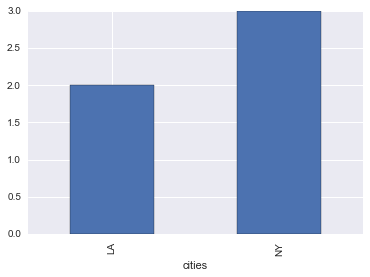

In [56]:
df.groupby("cities")['cat2'].count().plot(kind="bar")

## Show of hands -- who remembers how to groupby with more than one variable?

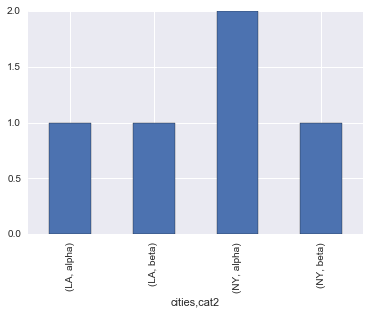

In [57]:
df.groupby(["cities","cat2"]).size().plot(kind="bar")

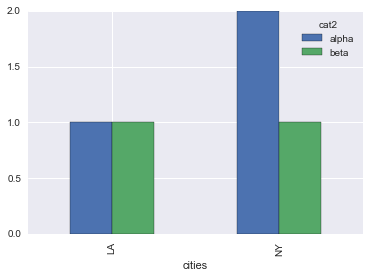

In [58]:
# Unstack will pull-apart group values for easy display
df.groupby(["cities","cat2"]).size().unstack().plot(kind="bar")

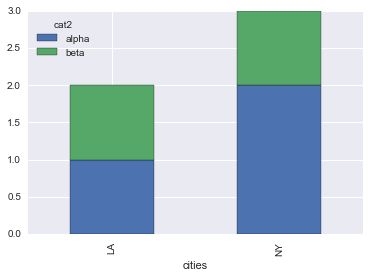

In [59]:
# Stacking isn't a bad choice for fewer categories but can look cluttery with lots of categories
# Why unstack() then plot(stacked=True)?  For display purposes, plot needs 2 categories as input.
# When using groupby(), the output is a single combined index (ie: (NY, alpha)), rather than two separate 
# entites.  Thus, unstack() -> break apart by category, plot(stacked=True) -> combine seperate entities
df.groupby(["cities","cat2"]).size().unstack().plot(kind="bar", stacked=True)

Bar charts are great for displaying quanitites with groups and understanding qantity / size within subsets.  This is only an "introduction".  There are many ways to plot things.

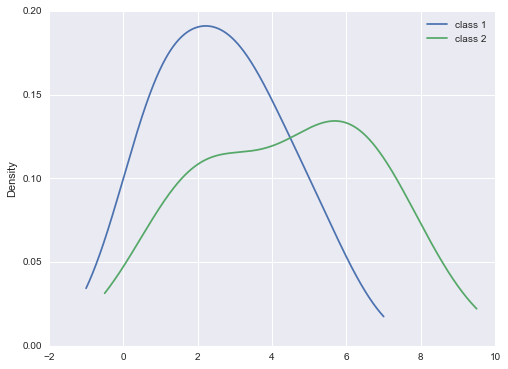

In [60]:
import matplotlib.pyplot as plt

classes = ["class 1"] * 5 + ["class 2"] * 5
vals = [1,3,5,1,3] + [2,6,7,5,2]
p_df = pd.DataFrame({"class": classes, "vals": vals})

fig, ax = plt.subplots(figsize=(8,6))
for label, group_df in p_df.groupby('class'):
    group_df.vals.plot(kind="kde", ax=ax, label=label)
plt.legend()

cities
LA    Axes(0.125,0.125;0.775x0.775)
NY    Axes(0.125,0.125;0.775x0.775)
dtype: object

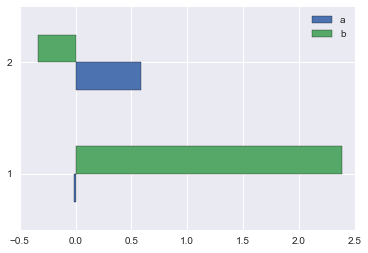

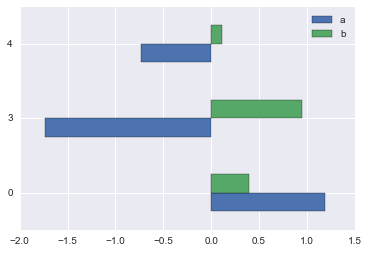

In [61]:
# This could be labled better but notice we can also plot negative values
df.groupby("cities").plot(kind="barh")

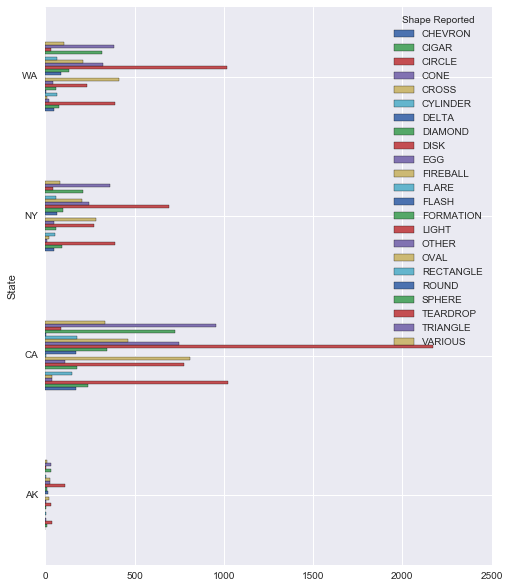

In [77]:
# Here's a plot I made with mysterious code!


## Group Exercize (~80mins-ish)

We are going to investigate the nuances of UFO sightings around the US.  By now you should be able to perform groupby operations in multiple dimensions and investigate the relationships between subsets of datasets with basic aggregation.

_Protip, to turn off slide type headers from every dataframe, go to "View" and select "None" from "Cell Toolbar"_

In [ ]:
import pandas as pd, numpy as np, seaborn as sns

%matplotlib inline

In [ ]:
# Load the UFO dataset!
# Did you know you can load csv over HTTP?  It's not ideal, but it can be done!
ufo = pd.read_csv('https://raw.githubusercontent.com/sinanuozdemir/SF_DAT_17/master/data/ufo.csv')

### 1. How many non-null values exist per each variable?

The first thing that is important to know is how complete our dataset is and how uniform are the values.

In [ ]:
# Solution here

### 2. What is the breakdown of dtypes in our dataframe?

In [ ]:
# Solution here

### 3. Provide a "Data Dictionary" that describes these features:

 - Variable / feature name
 - Brief description of what variable appears to represent
 - Expected dtype(s)
 - Number of unique values observed if categorical and < 20 unqiue 

_Please use "Markdown" tables to provide this info.  It's a good idea to get familliar with using markdown format when communicating your results.  Here's a primer on [markdown tables](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables).  No groaning allowed!_

In [ ]:
## Change this cell to a "markdown" type cell

### 3. Which colors are most commonly reported?
Provide a breakdown of colors by count.

### 4. Which shapes are most commonly reported?

### 5. Are there any shapes that take on some colors more than others?
_* Warning: Use of broad langauge._

### 6. Display only the group for "CIGAR" using a bit mask.. 
Go ahead try it out.

### 7. Return only the group for "VARIOUS" without using a bit mask..
It can be done and we're not just making this up!

### 8. Plot the counts of shapes, states, colors
Double check our notebook and feel free to use Google for help.

### 9. Plot counts of sightings per City

### 10.  Your co-worker in your data science team has approached you with some concerns..

<center>![a real data scientist](http://nerdist.com/wp-content/uploads/2016/02/20160225_becausescience_pokemon_1x1.jpg)
_* Actual data scientists may vary in appearance_
</center>


They tell you that group counting your sightings by city might be inaccurate.  How can you reassure them that your logic is sound and you are certianly correct?  Demonstrate to them, in any other way possible (with code) that you think counting groups by city is a good idea (right?).  Show them by using another method, or grouping in conjunction with other variables validates your assumptions.

### 11.  Which cities have the most "CIGAR" sightings?

---

Ask instructors for help on everything previous to this point, but we have designed the bonus material around collaboration in mind.  The next few problems are to be completed without instructor help.

```
if lab_question > 11:
    no_instructors_allowed()
```

### 12.  Bonus:  Display only top 20 shape counts reported by state!

This is a weird problem yes?  You're going to have weird questions and google is your friend!  So for this problem, we have found the answer with the search term "pandas top 10 by group" is a semi-obvious place where you will find many of these types of answers.

You will easily find the answer but you will need to think about how to implement the solution as the ones you find won't be copy and paste but should demonstrate the intuition for doing so using a grouby object.

This is the expected output, _using a groupby() and [some method(s)] to display "State" and "Shape" as your group indexes with a count!_:

```
State  Shape Reported
CA     LIGHT             2171
       CIRCLE            1023
WA     LIGHT             1016
CA     TRIANGLE           955
FL     LIGHT              916
TX     LIGHT              847
CA     FIREBALL           808
       DISK               775
       OTHER              749
       SPHERE             726
NY     LIGHT              691
AZ     LIGHT              677
IL     LIGHT              600
PA     LIGHT              581
OH     LIGHT              525
FL     FIREBALL           524
MI     LIGHT              468
FL     CIRCLE             467
OR     LIGHT              466
CA     OVAL               465
dtype: int64
```

### 13.  Bonus:  What are the top 20 shapes by City + State?


### 14. Bonus: What hours of the day are sightings most commonly reported?

To solve this problem, you will need to follow these steps:
    - Convert time feature to datetime type
    - Create a new feature based on a characteristic of the first step
    - Check our Slack for how to accomplish this (dyerrington posted this recently) 
    
There are at least 3 students who have asked how to do this out of personal interest in our class.  Your mission is to seek them out for advice.  No instructors allowed!

### 15. BONUS BONUS:  Generally, what interesting insights can you share about our UFO dataset?
    
Be as detailed as possible and tell us a nice story (long or short), about your observations.  Great ideas are:
 - Summary statistics
 - Outliers
 - Patterns
 - Latent characteristics
 - Graphs / plots / ascii art

## Review

Groupby functionality draws from the Split-Apply-Combine Strategy [Hadley Wickham](https://www.jstatsoft.org/article/view/v040i01)
   
    
![](https://www.safaribooksonline.com/library/view/python-data-science/9781491912126/assets/split_apply_combine.png)

## Another Example:  What is the aggregate function in this case?

![](https://snag.gy/Tbe4Zz.jpg)

## Why might it be useful to use grouping in terms of analysis?